![banner](https://anopheles-genomic-surveillance.github.io/_images/banner.jpg)

***Training course in data analysis for genomic surveillance of African malaria vectors***

**[Workshop 7](about) - Gene flow and the spread of insecticide resistance**

---


# Module 3 - Investigating gene flow at loci of interest using haplotype clustering

**Theme: Analysis**

In the previous module of workshop 7, we saw how selective sweeps can be shared between populations through adaptive gene flow. When we find loci of interest like this, where we have evidence that gene flow is occuring, we may want to investigate in more detail. We may want to know how many different haplotypes are under selection (i.e. how many independent selective sweeps are there). We may also want to know how far these haplotypes have spread, both in geographical space and between species. To answer these questions, we can analyse the similarity of our haplotypes with haplotype clustering.

## Learning objectives

- Explain why we want to perform haplotype clustering.
- Understand what a dendrogram is and what it displays.
- Use haplotype clustering to investigate genomic regions with evidence of adaptive gene flow.

## Lecture

### English

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/vLaYSHreQ8Y" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Français

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/VHhD6K2gpIM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Setup
Install and import the packages we'll need.

In [1]:
# First, install some packages we require
# !pip install malariagen_data -q 

!pip install malariagen_data "ipinfo<4.4"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.0 MB/s 
     |████████████████████████████████| 185 kB 26.6 MB/s 
     |████████████████████████████████| 9.9 MB 28.6 MB/s 
     |████████████████████████████████| 3.6 MB 39.4 MB/s 
     |████████████████████████████████| 5.7 MB 29.5 MB/s 
     |████████████████████████████████| 301 kB 66.8 MB/s 
     |████████████████████████████████| 3.7 MB 48.0 MB/s 
     |████████████████████████████████| 3.0 MB 27.3 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 1.6 MB 36.7 MB/s 
     |████████████████████████████████| 6.6 MB 11.5 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=a781fb2e3a1ab9e3f1adc86d4923b99c4f70b103961a8115e0232d5ff5d85d9f
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
  Cre

In [2]:
# Import libraries 
import malariagen_data
import numpy as np
import scipy.cluster
import matplotlib.pyplot as plt
import string


def dendrogram(
    haplotypes, 
    linkage_method='single', 
    metric='hamming', 
    orient='right', 
    size=(7,5)
):
    """Takes a 2D numpy array of values and performs hierarchical clustering 
    and plots dendrogram."""
    
    # perform clustering
    linkage_matrix = scipy.cluster.hierarchy.linkage(
        haplotypes, 
        method=linkage_method, 
        metric=metric
    )
    if metric == 'hamming': 
        # convert hamming to number of snp differences
        linkage_matrix[:,2] *= haplotypes.shape[1] 
    
    # plot a dendrogram
    figsize = size if orient == 'right' else size[::-1]
    fig, ax = plt.subplots(figsize=size) 
    z = scipy.cluster.hierarchy.dendrogram(
        linkage_matrix,
        orientation=orient,
        leaf_rotation=0 if orient=='right' else 90,
        # label leaf nodes using letters
        labels=[' '.join(map(str, row)) + " | " + str(letter) 
                for letter, row in zip(string.ascii_uppercase, haplotypes)], 
        ax=ax
    )
    
    # tidy up the plot
    if orient == "right":
        ax.set_xlabel("Distance (no. SNPs)") 
        ax.set_ylabel("Haplotypes") 
        # change the limit so we can easily see identical haplotypes
        ax.set_xlim(-0.05, np.max(z['dcoord']) + 0.2)
    else:
        ax.set_xlabel("Haplotypes")
        ax.set_ylabel("Distance (no. SNPs)")
        # change the limit so we can easily see identical haplotypes
        ax.set_ylim(-0.05, np.max(z['dcoord']) + 0.2)


## Introduction to hierarchical clustering

Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups. It is widely-used across a vast array of fields, and there are many different algorithms and approaches to perform clustering.

In this module we will use one approach, called hierarchical clustering. In hierarchical clustering, the algorithms typically begin with every data point in its own cluster, and then pairs of data points or clusters are merged moving up the hierarchy. The order in which we merge two points is based on their distance (smallest distance first). We can visualise this clustering with dendrograms, which provide us with a visual interpretation of the hierarchical relationship between variables. 

The below animation shows this clustering process both in 2D space (left), and moving up the dendrogram hierarchy (right). We can see that we begin by grouping the two closest data points first, and continue iteratively until all data points are in one cluster, at which point, the dendrogram is complete. Here, the sample indices correspond to the dendrogram leaves.

<center><img src="https://raw.githubusercontent.com/sanjaynagi/locusPocus/main/docs/hier_slow.gif" alt="drawing" width="700"/></center>

To gain some intuition for both hierarchical clustering and dendrograms, we'll create some artificial 'haplotypes', and cluster them in the same way that we would when performing analyses.

In [3]:
haplotypes = np.array(
    [[0, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # hap A
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # hap B
     [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # hap C
     [0, 0, 1, 1, 0, 0, 1, 1, 1, 1],  # hap D 
     [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # hap E
     [0, 0, 1, 1, 0, 1, 1, 1, 1, 1],  # hap F
     [0, 1, 0, 1, 0, 0, 1, 1, 1, 1],  # hap G
     [0, 1, 0, 1, 0, 0, 0, 0, 0, 0]],  # hap H
) 

haplotypes.shape

(8, 10)

There are 8 haplotypes, and each haplotype contains 10 SNPs, though some of the SNPs are invariant. We can probably tell just by looking, that some haplotypes in this array look quite similar to each other. 

We will label the dendrogram leaves with the haplotype ID (A-H) and its sequence, and perform hierarchical clustering to see how the clustering algorithm is working.

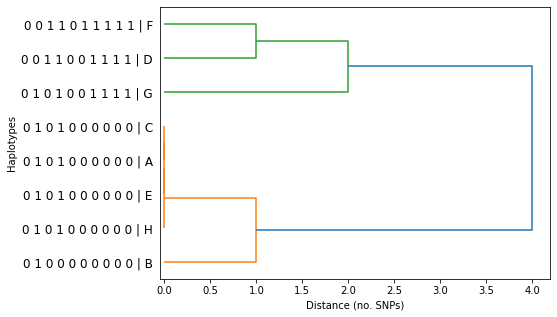

In [4]:
dendrogram(haplotypes, metric='hamming', linkage_method='single', orient='right')

When looking for selective sweeps in dendrograms, we are looking for large clusters of identical or very closely related haplotypes. We can see that the algorithm is grouping similar haplotypes together (i.e. clustering). We can also see there are 4 haplotypes (C,A,E,H) which are identical to each other. By looking at the x-axes, the distance between haplotypes in SNPs, we can discern how closely related haplotypes are. For example, haplotype B is 1 SNP away from the four identical haplotypes (C,A,E,H).

When we perform hiearchical clustering we must specify the **distance metric**, which is how we calculate the distance between data points, or in our case haplotypes. For haplotype analysis, we use something called hamming distance, shown below. 

<center><img src="https://www.researchgate.net/profile/Fredrick-Ishengoma/publication/264978395/figure/fig1/AS:295895569584128@1447558409105/Example-of-Hamming-Distance.png" alt="drawing" width="300"/></center>

The Hamming distance between two equal-length vectors is the number of positions at which the corresponding values are different. In the case of haplotypes, it is the proportion of SNPs on the haplotype that differ. We can multiply this value by the total number of SNPs, to get a distance which corresponds to the total number of SNP differences.

We must also specify a **linkage method**. This parameter determines how we calculate the distance between clusters at each stage of the clustering process. See the below image. The distance for single linkage takes the shortest distance between any pair of between cluster data points, whereas complete linkage takes the longest possible distance.

<center><img src="https://editor.analyticsvidhya.com/uploads/40351linkages.PNG" alt="drawing" width="500"/></center>

Lets take a look at this using our artificial haplotypes...

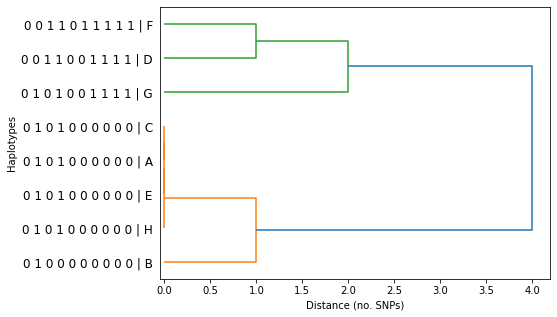

In [5]:
dendrogram(haplotypes, linkage_method='single', metric='hamming', orient='right')

In the above plot, haplotype G and (F,D) have a distance between them of 2 SNPs. This is because haplotype G differs from haplotype D by 2 SNPs, but differs from haplotype F by 3 SNPs. As we are using single linkage, the shortest distance (2 SNPs) is used as the distance between the clusters.

Lets see what happens if we use complete linkage.

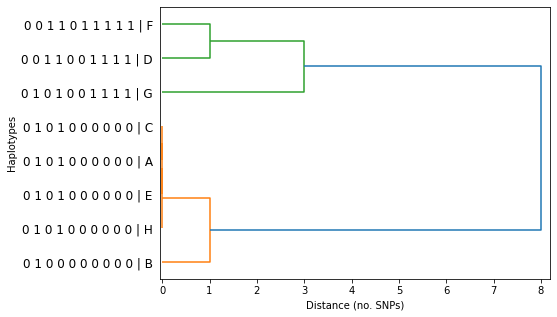

In [6]:
dendrogram(haplotypes, linkage_method='complete', metric='hamming', orient='right')

Now we can see that the distance at that position is now 3 SNPs, which is what we would expect - it's now the maximum distance between cluster members. If we compare the orange and green clusters, we can also see that the overall distance between them has changed from 4 SNPs to 8 SNPs. Thats because the four identical orange haplotypes (C,A,E,H) only differ from haplotype G by 4 SNPs, whereas haplotype B differs haplotype F by 8 SNPs! 

It's important to note that in practice, however, the exact choice of linkage method will not have much affect on the overall dendrogram shape, or on our conclusions. This is because we are looking for large clusters of identical or near-identical haplotypes, and they will appear similar regardless of the linkage method. Therefore, it's quite fine to stick with the default - single linkage. 

Lets see the same plot again, but this time change the orientation. This is how we will view the dendrogram when analying our *Anopheles gambiae* haplotypes.

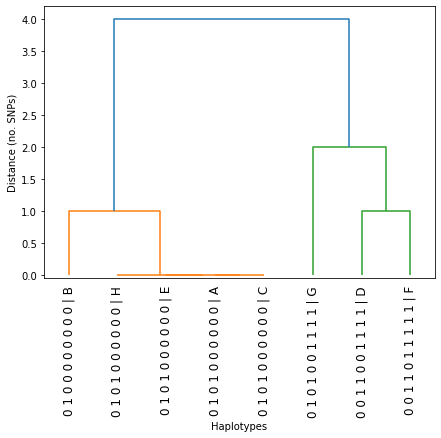

In [7]:
dendrogram(haplotypes, linkage_method='single', metric='hamming', orient='top')

When we look at a region of the genome under selection, we should see clusters of haplotypes that look highly similar to each other. Patterns like the four identical haplotypes may be indicative of a selective sweep, where a beneficial mutation has arisen and spread through a population. The spread of the beneficial allele also causes nearby linked mutations to spread with it, through hitchhiking - because the nearby alleles are in close physical proximity, they are inherited together. This means that when you look in a specific genomic region under selection, haplotypes which have the same selective sweep will appear as highly similar or identical. This signature is captured by genome-wide selection scans, for example, H12. 

When we perform haplotype clustering in *An. gambiae* s.l, the procedure is exactly as above, the only difference being that rather than haplotypes 10 SNPs long, we use much larger windows of haplotypes.

## Haplotype clustering

Lets first configure access to the MalariaGEN Ag3 data resource.

In [8]:
ag3 = malariagen_data.Ag3()
ag3

/usr/local/lib/python3.7/dist-packages/malariagen_data/anopheles.py:130: UserWarning: 
Your currently allocated Google Colab VM is not located in the US.
This usually means that data access will be substantially slower.
If possible, select "Runtime > Disconnect and delete runtime" from
the menu to request a new VM and try again.

  """


<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release/
Data releases available : 3.0
Results cache           : None
Cohorts analysis        : 20220608
Species analysis        : aim_20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 7.0.3
Client location         : Taiwan, TW (colab)
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact data@malariagen.net. For API documentation see 
https://malariagen.github.io/vector-data/ag3/api.html

For this module we introduce a new function `ag3.plot_haplotype_clustering()`. This function produces an interactive dendrogram with plotly, which allows us to hover over leaves and retrieve information about each haplotype, such as its species, or the country and sample set it belongs to. We can also colour the leaves and control their shape with the use of the `color` and `symbol` parameters. Lets take a look at the help for this function...

In [11]:
?ag3.plot_haplotype_clustering

The arguments are similar to that of functions we've seen earlier in the malariagen_data API. There are arguments for region (the genomic window), which haplotype phasing analysis, sample sets and sample queries. By default, the function will use all samples in the '3.0' release.




**An example of a locus not under selection**

Before we dive into some loci of interest, lets begin with an example of what haplotype clustering looks like in regions of the genome that are not under selection. Neutrally evolving regions of the genome will show different patterns to that of selective sweeps. In particular, we should not see large clusters of highly similar haplotypes, unless the population has an unusual demographic history.

We will take a look at a genomic region on the 3L chromosomal arm, in haplotypes from Ghana and Cote D'Ivoire. To find a neutral region of the chromosome, I've already run a H12 analysis on these cohorts. 

In [9]:
ag3.plot_haplotype_clustering(
    region='3L:31,800,000-31,820,000',
    analysis='gamb_colu',
    sample_query= 'country in ["Ghana", "Cote d\'Ivoire"]')

Load sample metadata:   0%|          | 0/28 [00:00<?, ?it/s]

Load haplotypes:   0%|          | 0/8 [00:00<?, ?it/s]

We can see that unlike our artificial haplotypes, there doesn't seem to be any clusters of haplotypes that look identical or close to identical. In fact, most haplotypes look like they are generally quite distant from each other, based on the number of SNP differences. 

The `ag3.plot_haplotype_clustering()` function provides us with information on the sample sets and sample queries, as well as the genomic region and number of SNPs found within that region. We can zoom into the plot, and hover over the dendrogram leaves to return information each haplotype. Hovering over nodes of the dendogram branches will also return the distance in SNPs between haplotype clusters.

### Example: *Ace1*

Following on from module 1 where we looked at organophosphate resistance, lets take a look at the *Ace-1* locus, in some haplotypes from  from Ghana and Cote D'Ivoire. It has previously been reported that the *Ace1*-G280S mutation can be found in these countries. For now, lets restrict our analysis just to *Anopheles gambiae*, and focus on haplotype spread between countries. We'll colour the leaves of the dendrogram by sample country.

In [10]:
ag3.plot_haplotype_clustering(
    region='2R:3,470,000-3,490,000',
    analysis='gamb_colu',
    sample_query= 'country in ["Ghana", "Burkina Faso", "Cote d\'Ivoire"] and taxon == "gambiae"',
    color='country'
)

Load haplotypes:   0%|          | 0/16 [00:00<?, ?it/s]

We see one major group of haplotypes which look highly similar to each other. We also can see see that this cluster contains a mixture haplotypes from Burkina Faso and Ghana. From that, we can infer that the haplotype has spread to both countries from a common origin via gene flow. The haplotype could have spread directly between the countries or spread via another country. It is important to note that we cannot infer the origin of the haplotype from this analysis. 

Lets take another look, but this time we'll include any *An. coluzzi* haplotypes, and we'll change the shape of the dendrogram leaves based on taxon, to try and see if there has been any adaptive gene flow between species (adaptive introgression). 

In [11]:
ag3.plot_haplotype_clustering(
    region='2R:3,470,000-3,490,000',
    analysis='gamb_colu',
    sample_query= 'country in ["Ghana", "Burkina Faso", "Cote d\'Ivoire"]',
    color='country',
    symbol='taxon'
)

Load haplotypes:   0%|          | 0/20 [00:00<?, ?it/s]

We can now see that this same sweep is also found in *Anopheles coluzzii*. We can infer that at some point, the haplotype has introgressed from one species into the other. We also see that it is found in Cote D'Ivoire.

### Example: *Gste2*

We also saw in module 1 that the *Gste2* gene is associated with insecticide resistance, and previous work has shown that selection signals are common at this locus. Lets perform haplotype clustering and see if there is evidence for adaptive gene flow. Again, lets set the symbol parameter to taxon, and colour the leaves by country to try and identify gene flow between species and geographic locations.

In [12]:
ag3.plot_haplotype_clustering(
    region='3R:28,590,000-28,600,000',
    analysis='gamb_colu',
    sample_query= 'country in ["Ghana", "Burkina Faso", "Cote d\'Ivoire"]',
    color='country',
    symbol='taxon'
)

Load haplotypes:   0%|          | 0/20 [00:00<?, ?it/s]

Here, we can see that there are multiple selective sweeps ongoing. One of the sweeps in particular seems to show more haplotype sharing between *An. gambiae* and *An. coluzzii* than the other sweeps. We can also see that many of the haplotype clusters contain haplotypes from multiple countries.

### Example: *Cyp9k1*

Finally, lets take a look at the cytochrome P450, CYP9K1, which is associated with pyrethroid resistance.

In [13]:
ag3.plot_haplotype_clustering(
    region='X:15,230,000-15,250,000',
    analysis='gamb_colu',
    sample_query= 'country in ["Ghana", "Burkina Faso", "Cote d\'Ivoire"]',
    color='country',
    symbol='taxon'
)

Load haplotypes:   0%|          | 0/20 [00:00<?, ?it/s]

We can see immediately that the there are multiple selective sweeps again. Some of these have spread between countries. At this locus, most of the sweeps seem to be isolated to one species, however, there are exceptions. 

## What genomic region size should we use for haplotype clustering?

When we select a genomic region, we want to choose a region size where normally (in absence of recent positive selection) you would see very little haplotype sharing. We want a region that is large enough to contain many SNPs, but not large enough that recombination has broken down haplotypes under selection, so that they no longer cluster together.

In the above examples, we used genomic regions of either 10 or 20kb. However, for haplotype clustering, a metric that may be more important than the actual region size (in bp), is the number of SNPs present within that region. 

SNP density isn't even across the genome, and because they are filtered, that SNPs that make it into the haplotype analysis can be patchy. Therefore, the size of a genomic region is not always a good guide to the number of SNPs. 

As we have seen, the `plot_haplotype_clustering()` function reports the number of SNPs in the genomic region, which we can use to check our genomic region is of appropriate size. In practice, the region needs to contain at least as many SNPs as what was used in H1X selection scans, and this way we can be sure not to expect an clusters of identical haplotypes. 

To demonstrate this, lets use the same neutral locus as we did at the beginning:

In [14]:
ag3.plot_haplotype_clustering(
    region='3L:31,800,000-31,820,000',
    analysis='gamb_colu',
    sample_query= 'country in ["Ghana", "Cote d\'Ivoire"]')

Load haplotypes:   0%|          | 0/8 [00:00<?, ?it/s]

 ... but using instead a genomic window of size 1000bp:

In [15]:
ag3.plot_haplotype_clustering(
    region='3L:31,800,000-31,801,000',
    analysis='gamb_colu',
    sample_query= 'country in ["Ghana", "Cote d\'Ivoire"]')

Load haplotypes:   0%|          | 0/8 [00:00<?, ?it/s]

## Caveat - what else can cause haplotype similarity in a population?

It is important to remember that demography can cause similar patterns of haplotype similarity. As we saw in earlier workshops, we saw evidence of cryptic species in the gambiae complex. In East Africa, there is a population (gcx3) which displays a high degree of haplotype sharing and haplotype similarity across the genome. The population is highly inbred and many individuals share long runs of homozygosity. Lets plot the same region as above, but in the Kenyan population.

In [16]:
ag3.plot_haplotype_clustering(
    region='3L:31,800,000-31,820,000',
    analysis='gamb_colu',
    sample_sets= "AG1000G-KE"
)

Load haplotypes:   0%|          | 0/4 [00:00<?, ?it/s]

Load sample metadata:   0%|          | 0/1 [00:00<?, ?it/s]

In the above plot, we easily could be fooled into thinking there are selective sweeps ongoing. However, this pattern is similar where ever you look in the genome...

In [17]:
ag3.plot_haplotype_clustering(
    region='3L:21,800,000-21,820,000',
    analysis='gamb_colu',
    sample_sets= "AG1000G-KE"
)

Load haplotypes:   0%|          | 0/4 [00:00<?, ?it/s]

For cases like this Kenyan population, its a good idea to make sure there is evidence of a selective sweep first, by performing H12 GWSS. The `h12_calibration` will also give an indication into the window sizes needed. 

In this case, the haplotype sharing is driven by demography of the population, and not selection. It is therefore important to be aware of the populations we are using and their demographic histories. Analyses of genetic diversity can indicate whether a population has extreme demography, particularly if diversity is low and Tajima's D is positive.

## Exercises

### English

1. Investigate the *Vgsc* locus in West Africa with haplotype clustering, in Ghana, Burkina Faso and Cote D'Ivoire. *Hint: sample_query= 'country in [Ghana", "Burkina Faso", "Cote d\\'Ivoire"]', VGSC gene coordinates: '2L:2,358,000-2,410,000'. This is a relatively large region so you may want to use a smaller window. If you are unsure, try it with multiple window sizes and examine the differences.*
    - Does it look as though any haplotype clusters have spread between species, or between countries? (*hint: set the colour and symbol parameters to 'taxon' or 'country')*. 
    - Are there any haplotype clusters which look as though they have not spread across countries or species? 
    
    
2. Perform a H1X scan between the same countries as in Exercise 1 on the 2L chromosomal arm to investigate haplotype sharing between species. *Hint: do a cohort query for each cohort, one which identifies gambiae,  and one coluzzii (query column: 'taxon').*
    - Apart from the VGSC *(2L:2,358,000-2,410,000)*, are there any other loci with evidence for adaptive gene flow between species? 
    - What genes are present in this region? Are any of them known to be involved in insecticide resistance?
    - At this locus, use haplotype clustering to answer the following questions:
        - Does it look like there is one or multiple selective sweeps?
        - Do any of the potential sweeps look like they have spread between species?
        - Do any of the potential sweeps look like they have spread between countries?
          
          

3. Perform haplotype clustering at the CYP6P/aa locus in a population of your choice or in the whole of 3.0. *Hint: 2R:28,480,000-28,500,000*
    - *Hint:* If you select your own population, first run H12 selection scans to check for a selective sweep signal.
    - How many sweeps are there? Is there evidence for adaptive gene flow?
    
### Français


1. Etudier le locus *Vgsc* en Afrique de l'Ouest en utilisant le regroupement d'haplotypes pour le Ghana, le Burkina Faso et la Côte D'Ivoire. *Indice: sample_query= 'country in [Ghana", "Burkina Faso", "Cote d\\'Ivoire"]', VGSC gene coordinates: '2L:2,358,000-2,410,000'. Il s'agit d'une région relativement vaste donc vous pouvez utiliser une fenêtre plus petite. Si vous avez un doute, essayez plusieurs tailles de fenêtres et regardez les différences.*
  - Avez-vous l'impression que certains groupes d'haplotypes se sont propagés entre espèces et/ou pays? (*Indice: choisir 'taxon' et 'country' comme valeur des paramètres colour et symbol.)*.
  - Avez-vous l'impression que certains groupes d'haplotypes ne se sont pas propagés entre espèces et/ou pays?


2. Réaliser un scan H1X entre les mêmes pays que pour l'Exercice 1 sur le bras de chromosome 2L pour étudier le partage des haplotypes entre espèces. *Indice: utiliser une requête pour chaque cohorte pour identifier les gambiae et les coluzzii (colonne: 'taxon').*
  - En omettant VGSC *(2L:2,358,000-2,410,000)*, y a-t-il d'autres loci où vous trouvez des indices d'un flux génétique adaptatif entre espèces?
  - Quels gènes se trouvent dans cette région? Lesquels sont impliqués dans la résistance aux insecticides?
  - A ce locus, utiliser le regroupement d'haplotypes pour répondre aux questions suivantes:
    - Vous semble-t-il qu'il y ait un ou plusieurs balayages sélectifs?
    - Est-ce que certains des balayages sélectifs se sont propagés entre espèces?
    - Est-ce que certains des balayages sélectifs se sont propagés entre pays?


3. Réaliser un regroupement d'haplotypes au locus CYP6P/aa pour une population de votre choix ou pour la totalité d'Ag3.0. *Indice: 2R:28,480,000-28,500,000*
  - *Indice:* Si vous choisissez une population, effectuez un scan de sélection H12 pour vérifier la présence d'un signal de balayage sélectif.
  - Combien de balayages observez-vous? Y a-t-il des indices d'un flux génétique adaptatif?


## Well done!

Haplotype clustering is a useful tool to help us to identify adaptive gene flow between species or geographic space, and determine the number of selective sweeps that are present. However, this does not give us an indication as to what mutations are driving the selective sweeps, and further work is needed to investigate this.

In [18]:
# Investigate the Vgsc locus in West Africa with haplotype clustering, in Ghana, Burkina Faso and Cote D'Ivoire. 
# Hint: sample_query= 'country in ["Ghana", "Burkina Faso", "Cote d\'Ivoire"]', VGSC gene coordinates: '2L:2,358,000-2,410,000'. 
# This is a relatively large region so you may want to use a smaller window. If you are unsure, try it with multiple window sizes and examine the differences.
# Does it look as though any haplotype clusters have spread between species, or between countries? (hint: set the colour and symbol parameters to 'taxon' or 'country').
# Are there any haplotype clusters which look as though they have not spread across countries or species?

ag3.plot_haplotype_clustering(
    region='2L:2,358,000-2,410,000',
    analysis='gamb_colu',
    sample_query= 'country in ["Ghana", "Burkina Faso", "Cote d\'Ivoire"]', 
    color = 'country',
    symbol =  'taxon'
)

Load haplotypes:   0%|          | 0/20 [00:00<?, ?it/s]

In [19]:
# coloring by taxon
ag3.plot_haplotype_clustering(
    region='2L:2,358,000-2,410,000',
    analysis='gamb_colu',
    sample_query= 'country in ["Ghana", "Burkina Faso", "Cote d\'Ivoire"]', 
    color = 'taxon',
    symbol =  'country'
)

Load haplotypes:   0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
ag3.plot_h1x_gwss?

In [20]:
# Perform a H1X scan between the same countries as in Exercise 1 on the 2L chromosomal arm to investigate 
# haplotype sharing between species. 
# Hint: do a cohort query for each cohort, one which identifies gambiae, and one coluzzii (query column: 'taxon').
# Apart from the VGSC (2L:2,358,000-2,410,000), are there any other loci with evidence for adaptive gene flow between species?
# What genes are present in this region? Are any of them known to be involved in insecticide resistance?

df_samples = ag3.sample_metadata()
df_samples.query('country in ["Ghana","Burkina Faso","Cote d\'Ivoire"]')["cohort_admin2_year"].value_counts()



BF-09_Houet_gamb_2012                         98
BF-09_Houet_colu_2012                         82
CI-LG_Agneby-Tiassa_colu_2012                 80
BF-09_Houet_colu_2014                         53
BF-09_Houet_gamb_2014                         46
GH-CP_Twifu-Heman-Lower-Denkyira_colu_2012    25
GH-WP_Shama-Ahanta-East_colu_2012             24
GH-EP_New-Juaben_gamb_2012                    23
GH-AA_Ga-East_colu_2012                       14
BF-07_Bazega_gamb_2004                        13
GH-AA_Ga-East_gamb_2012                       13
BF-09_Houet_arab_2014                          3
GH-EP_New-Juaben_colu_2012                     1
Name: cohort_admin2_year, dtype: int64

In [19]:
?ag3.plot_h1x_gwss

In [23]:
# h12 calibration for gambiae
ag3.plot_h12_calibration(
    contig="3L",
    analysis="gamb_colu",
    sample_query='country in ["Ghana","Burkina Faso","Cote d\'Ivoire"] and taxon == "gambiae"')

Load haplotypes:   0%|          | 0/704 [00:00<?, ?it/s]

Compute H12:   0%|          | 0/8 [00:00<?, ?it/s]

In [24]:
# h12 calibration for coluzzii
ag3.plot_h12_calibration(
    contig="3L",
    analysis="gamb_colu",
    sample_query='country in ["Ghana","Burkina Faso","Cote d\'Ivoire"] and taxon == "coluzzii"')

Load haplotypes:   0%|          | 0/616 [00:00<?, ?it/s]

Compute H12:   0%|          | 0/8 [00:00<?, ?it/s]

In [25]:
# coluzzii
ag3.plot_h12_gwss(
    contig="2L",
    analysis="gamb_colu",
    sample_query='country in ["Ghana","Burkina Faso","Cote d\'Ivoire"] and taxon == "coluzzii"',
    window_size=1000,
)

Load haplotypes:   0%|          | 0/798 [00:00<?, ?it/s]

In [26]:
ag3.plot_h1x_gwss(
    contig="2L",
    analysis="gamb_colu",
    cohort1_query="taxon == 'gambiae'",
    cohort2_query='country in ["Ghana","Burkina Faso","Cote d\'Ivoire"] and taxon == "gambiae"',
    window_size=1000,
)

Load haplotypes for cohort 1:   0%|          | 0/2280 [00:00<?, ?it/s]

Load haplotypes for cohort 2:   0%|          | 0/912 [00:00<?, ?it/s]

In [27]:
# At this locus, use haplotype clustering to answer the following questions:
# Does it look like there is one or multiple selective sweeps?
# Do any of the potential sweeps look like they have spread between species?
# Do any of the potential sweeps look like they have spread between countries?

ag3.plot_haplotype_clustering(
    region='2L:2,358,000-2,410,000',
    analysis='gamb_colu',
    sample_query= 'country in ["Ghana", "Burkina Faso", "Cote d\'Ivoire"]', 
    color = 'taxon',
    symbol =  'country'
)

Load haplotypes:   0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
# Perform haplotype clustering at the CYP6P/aa locus in a population of your choice or in the whole of 3.0. 
# Hint: 2R:28,480,000-28,500,000
# Hint: If you select your own population, first run H12 selection scans to check for a selective sweep signal.
# How many sweeps are there? Is there evidence for adaptive gene flow?

ag3.plot_haplotype_clustering(
    region='2R:28,480,000-28,500,000',
    analysis='gamb_colu', 
    color = 'country',
    symbol =  'country'
)

Load haplotypes:   0%|          | 0/106 [00:00<?, ?it/s]